# **Oracle Benchmarking** : Empiric Network vs ChainLink

Focusing on LUNA crash period : May 6 to May 25

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
import json

from ctc.protocols import chainlink_utils
from src.utils import DataParser, get_selector_from_name, normalize_submit_many_entry, filter_feeds
from src.pipeline import EmpiricNetworkLoader, ChainLinkLoader

## Empiric Network Data Retrieval

We will use both StarkNet Sequencer & a synced Node running Pathfinder to retrieve data. Not that it is not yet "verifyable" since there's no P2P syncing between StarkNet nodes yet -> Therefore it's unprovable getting the correct timestamp nor the correct information of a TX.

In [23]:
ENLoader = EmpiricNetworkLoader()

/Users/exo/Documents/ODA/oracle-benchmark/src/pipeline.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.price_feeds['normalized_entry'] = self.price_feeds.apply(
/Users/exo/Documents/ODA/oracle-benchmark/src/pipeline.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.price_feeds.dropna(subset=['normalized_entry'], inplace=True)
/Users/exo/Documents/ODA/oracle-benchmark/src/pipeline.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [24]:
ENLoader.raw_transactions.head(2)

,type,transaction_hash,max_fee,version,signature,nonce,contract_address,entry_point_selector,calldata,timestamp,function_info,parsed_calldata
0,INVOKE,0x3011775893da9c8e891090abc1a233d6ab8b03bcf6a0...,0x0,0x0,[],0x0,0x4a05a68317edb37d34d29f34193829d7363d51a37068...,0x3451875d57805682e40d0ad8e604fc4cc5f949d14ca8...,"[0x1a, 0x6574682f757364, 0x94b319d3b02e080000,...",1651788073,"{'inputs': [{'name': 'new_entries_len', 'type'...",<src.utils.DataParser object at 0x29af58970>
1,INVOKE,0x16caeadd977519fc24970021bccb84ad936e12e3ec95...,0x0,0x0,[],0x0,0x4a05a68317edb37d34d29f34193829d7363d51a37068...,0x3451875d57805682e40d0ad8e604fc4cc5f949d14ca8...,"[0x1a, 0x6574682f757364, 0x948f77dc12b4780000,...",1651788333,"{'inputs': [{'name': 'new_entries_len', 'type'...",<src.utils.DataParser object at 0x1688a7d30>


In [25]:
ENLoader.price_feeds

,timestamp,price,feed
0,1651788073,3.006213e-02,luna/eth
1,1651788333,3.016095e-02,luna/eth
2,1651788644,3.029866e-02,luna/eth
3,1651789012,3.029951e-02,luna/eth
4,1651789283,3.026009e-02,luna/eth
...,...,...,...
57472,1653601741,7.327244e-08,luna/eth
57473,1653601902,7.341559e-08,luna/eth
57474,1653602019,7.350528e-08,luna/eth
57475,1653602165,7.209940e-08,luna/eth


## ChainLink Data Retrieval

We will use a node to get dedicated Events for the LUNA / ETH feed (there's no LUNA / USD feed).

In [26]:
CLLoader = await ChainLinkLoader()

In [27]:
CLLoader.raw_transactions.head()

,block_number,transaction_index,log_index,address,block_hash,transaction_hash,contract_address,event_name,event_hash,arg__current,arg__roundId,arg__updatedAt
0,14721064,23,31,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xc66712513667503e85e377eb0ee823acc2d0213a2a65...,0x2caddb79c3cf9d375cf40e22ab709576542b064ab400...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,29525410408662240,1293,1651806255
1,14726397,94,125,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xeae18414cd27f8a3ee58e07804d2fbc7c998635d10fc...,0xe227f918d4c70ae1065253e62ccb1b712f0e4c281957...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,28909806872610724,1294,1651879141
2,14727610,44,36,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xcc779d093bf4a908a5ec7f00af26de51a0db8168696e...,0x5b09ad9ee5fd974d046c845eb6d30c85534288e96081...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,28312498091524703,1295,1651896119
3,14727696,36,45,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0x39d047dfc5889536772b903a9bf93c0472bd0e2e00b9...,0x8ba10d0269c30f34c5ef0364a8141a732a1e14610d37...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,27695020000000000,1296,1651897383
4,14731234,74,156,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,0xb5369a9635b29294c189a6db2683dfebe4d1b84f9394...,0x879d12a6f7edf0a8ad11e391e95ebaa050f4d26cdd7e...,0x1a8ac67a1b64f7fd71bb91c21581f036abe6aec2,AnswerUpdated,0x0559884fd3a460db3073b7fc896cc77986f16e378210...,27138650461100180,1297,1651945957


In [28]:
CLLoader.price_feeds

,price,timestamp,feed
0,2.952541e-02,1651806255,luna/eth
1,2.890981e-02,1651879141,luna/eth
2,2.831250e-02,1651896119,luna/eth
3,2.769502e-02,1651897383,luna/eth
4,2.713865e-02,1651945957,luna/eth
...,...,...,...
3090,7.983700e-08,1653606091,luna/eth
3091,7.811800e-08,1653606336,luna/eth
3092,8.022700e-08,1653606420,luna/eth
3093,8.249302e-08,1653606793,luna/eth


## Empiric VS ChainLink

In [29]:
ENLoader.price_feeds.head()

,timestamp,price,feed
0,1651788073,0.030062,luna/eth
1,1651788333,0.030161,luna/eth
2,1651788644,0.030299,luna/eth
3,1651789012,0.030300,luna/eth
4,1651789283,0.030260,luna/eth


In [30]:
CLLoader.price_feeds.head()

,price,timestamp,feed
0,0.029525,1651806255,luna/eth
1,0.028910,1651879141,luna/eth
2,0.028312,1651896119,luna/eth
3,0.027695,1651897383,luna/eth
4,0.027139,1651945957,luna/eth


<AxesSubplot: >

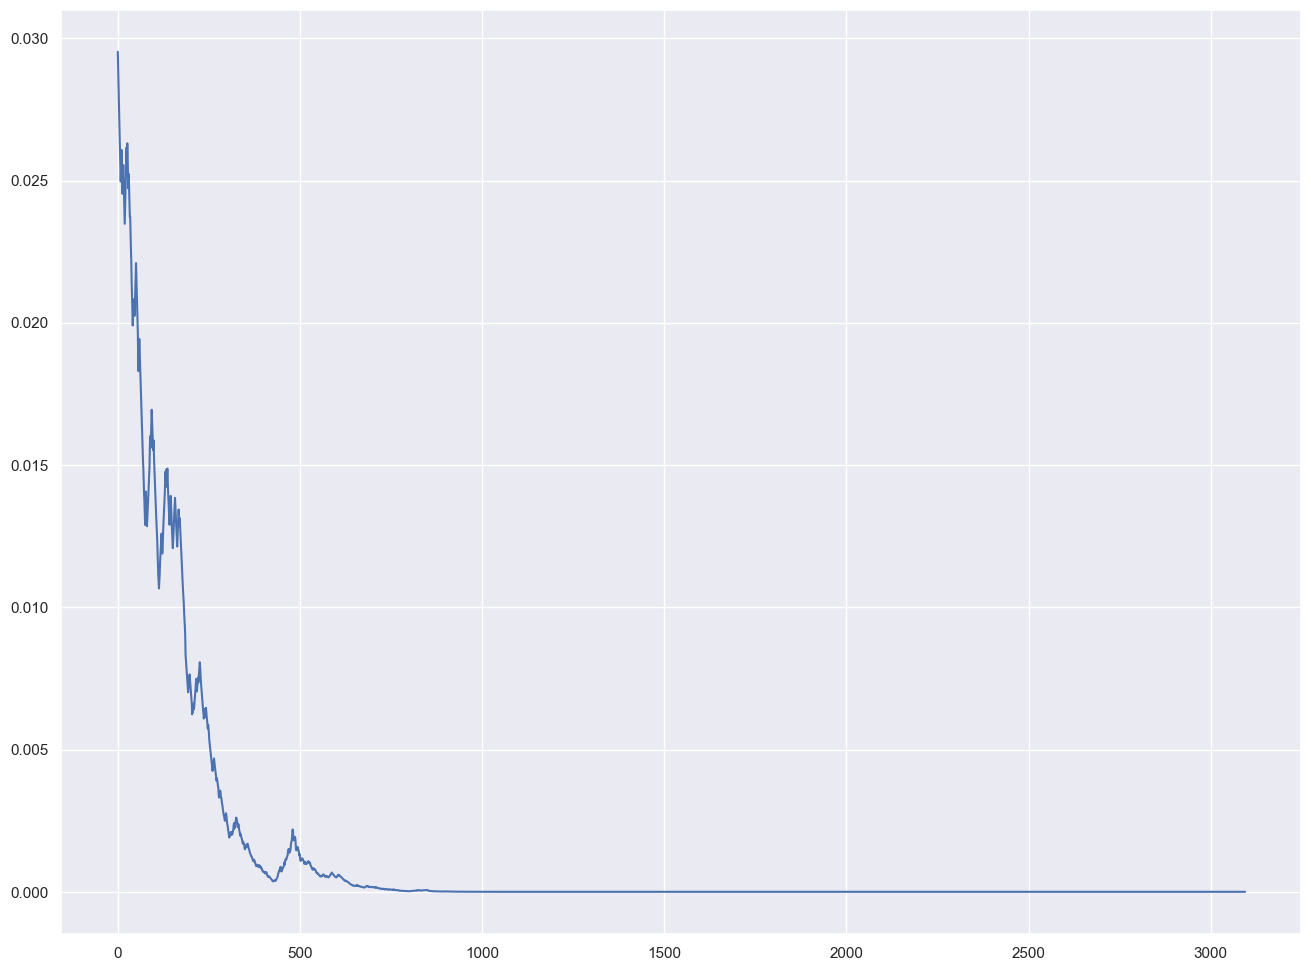

In [31]:
CLLoader.price_feeds.set_index('timestamp')
CLLoader.price_feeds['price'].plot(figsize=(16, 12))

<AxesSubplot: >

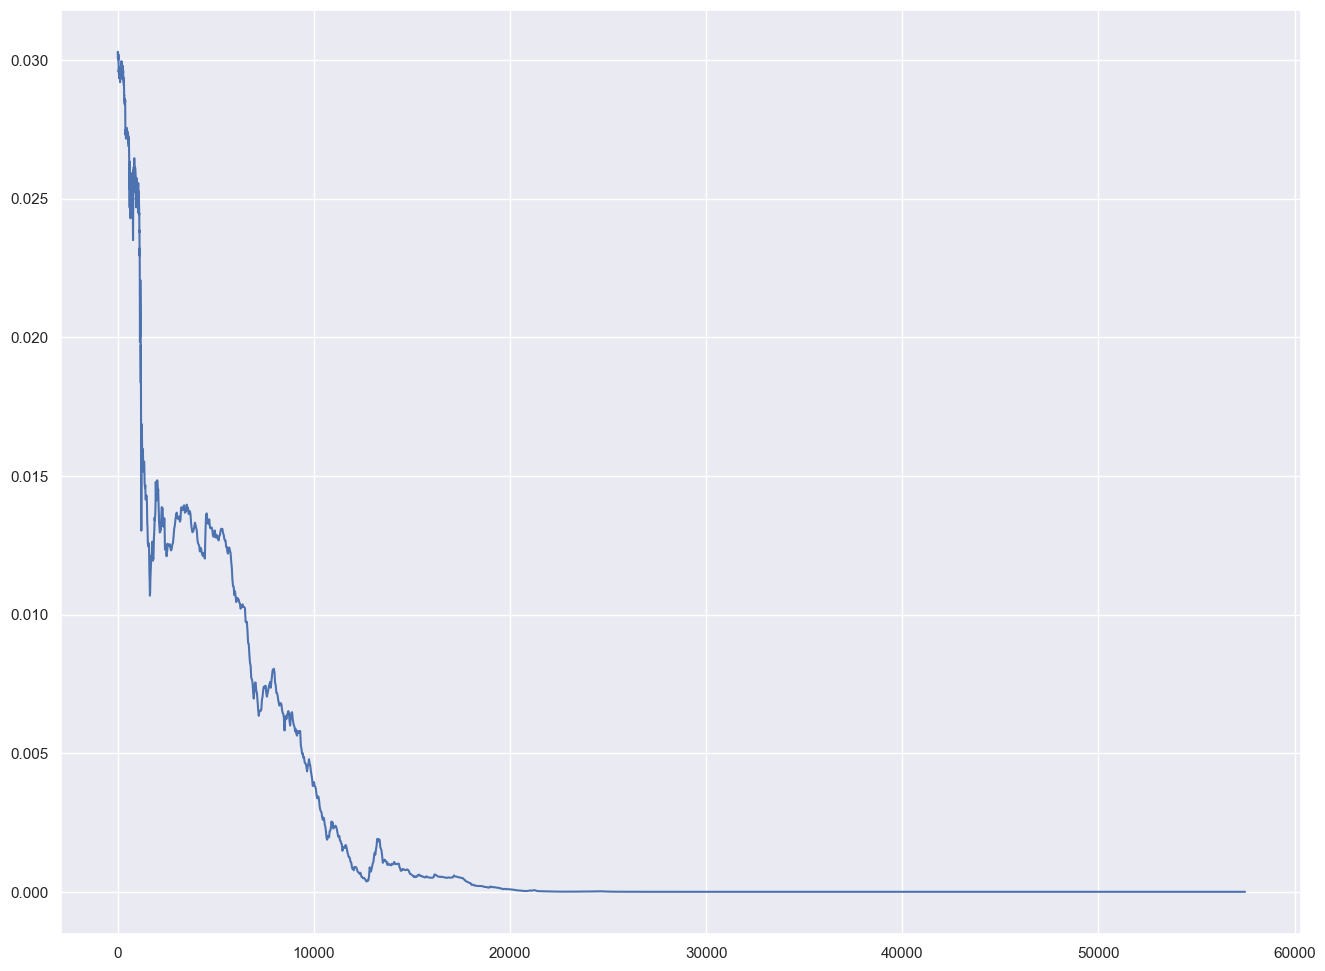

In [32]:
ENLoader.price_feeds.set_index('timestamp')
ENLoader.price_feeds['price'].plot(figsize=(16, 12))

In [33]:
import matplotlib.pyplot as plt

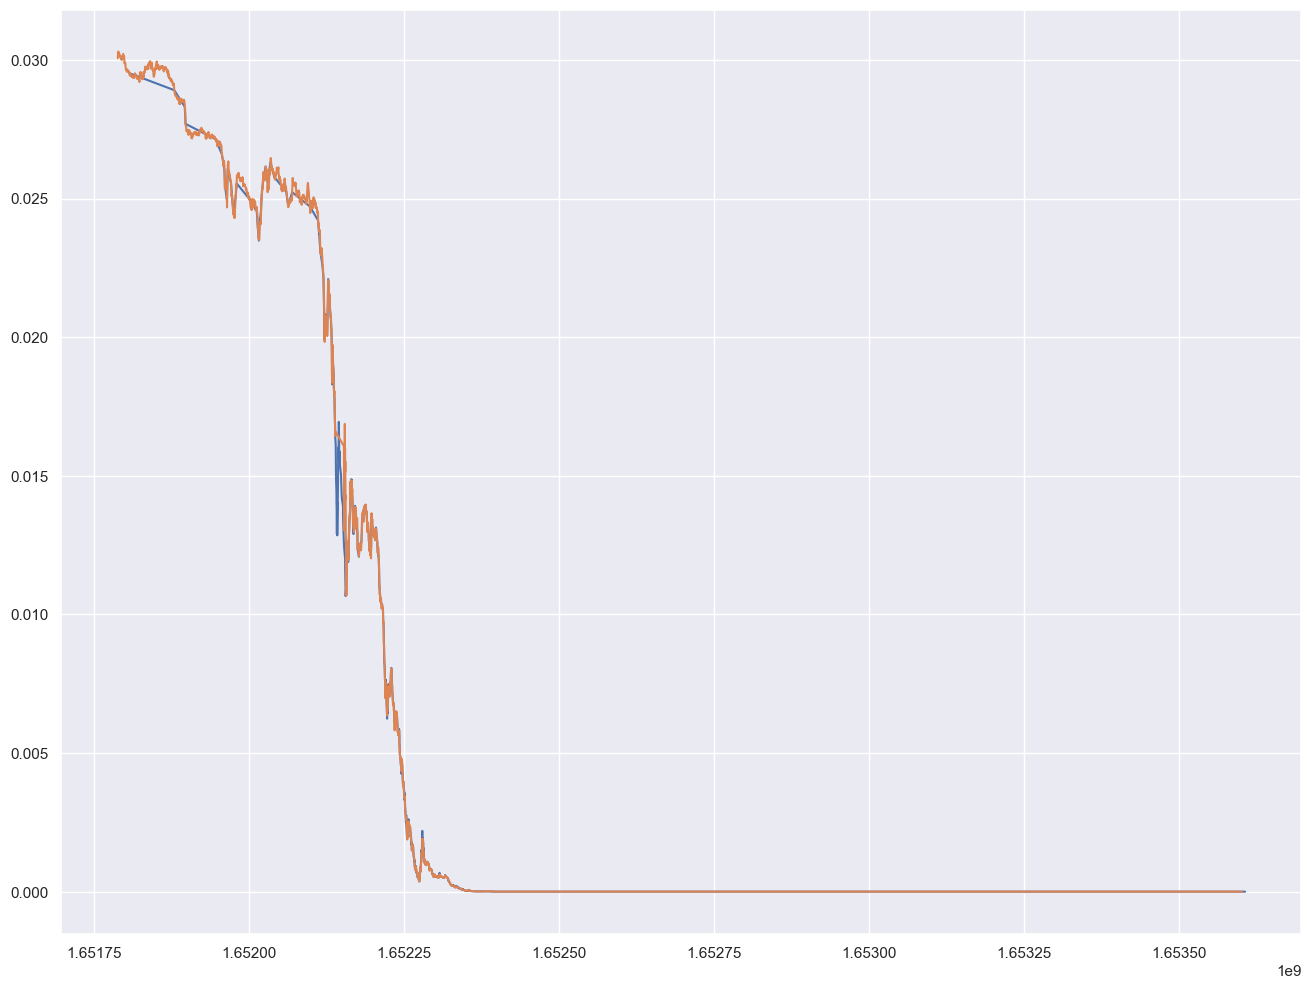

In [40]:
fig = plt.figure(figsize=(16, 12))

for feed in [CLLoader.price_feeds, ENLoader.price_feeds]:
    plt.plot(feed['timestamp'], feed['price'])

plt.show()